In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## __1 - Business Problem__  
___Build a decision tree for the ‘iris’ data___  

## __2 - Data collection and description__ 

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [4]:
df1 = df.copy()

In [5]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [7]:
df1.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [8]:
df1.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [9]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

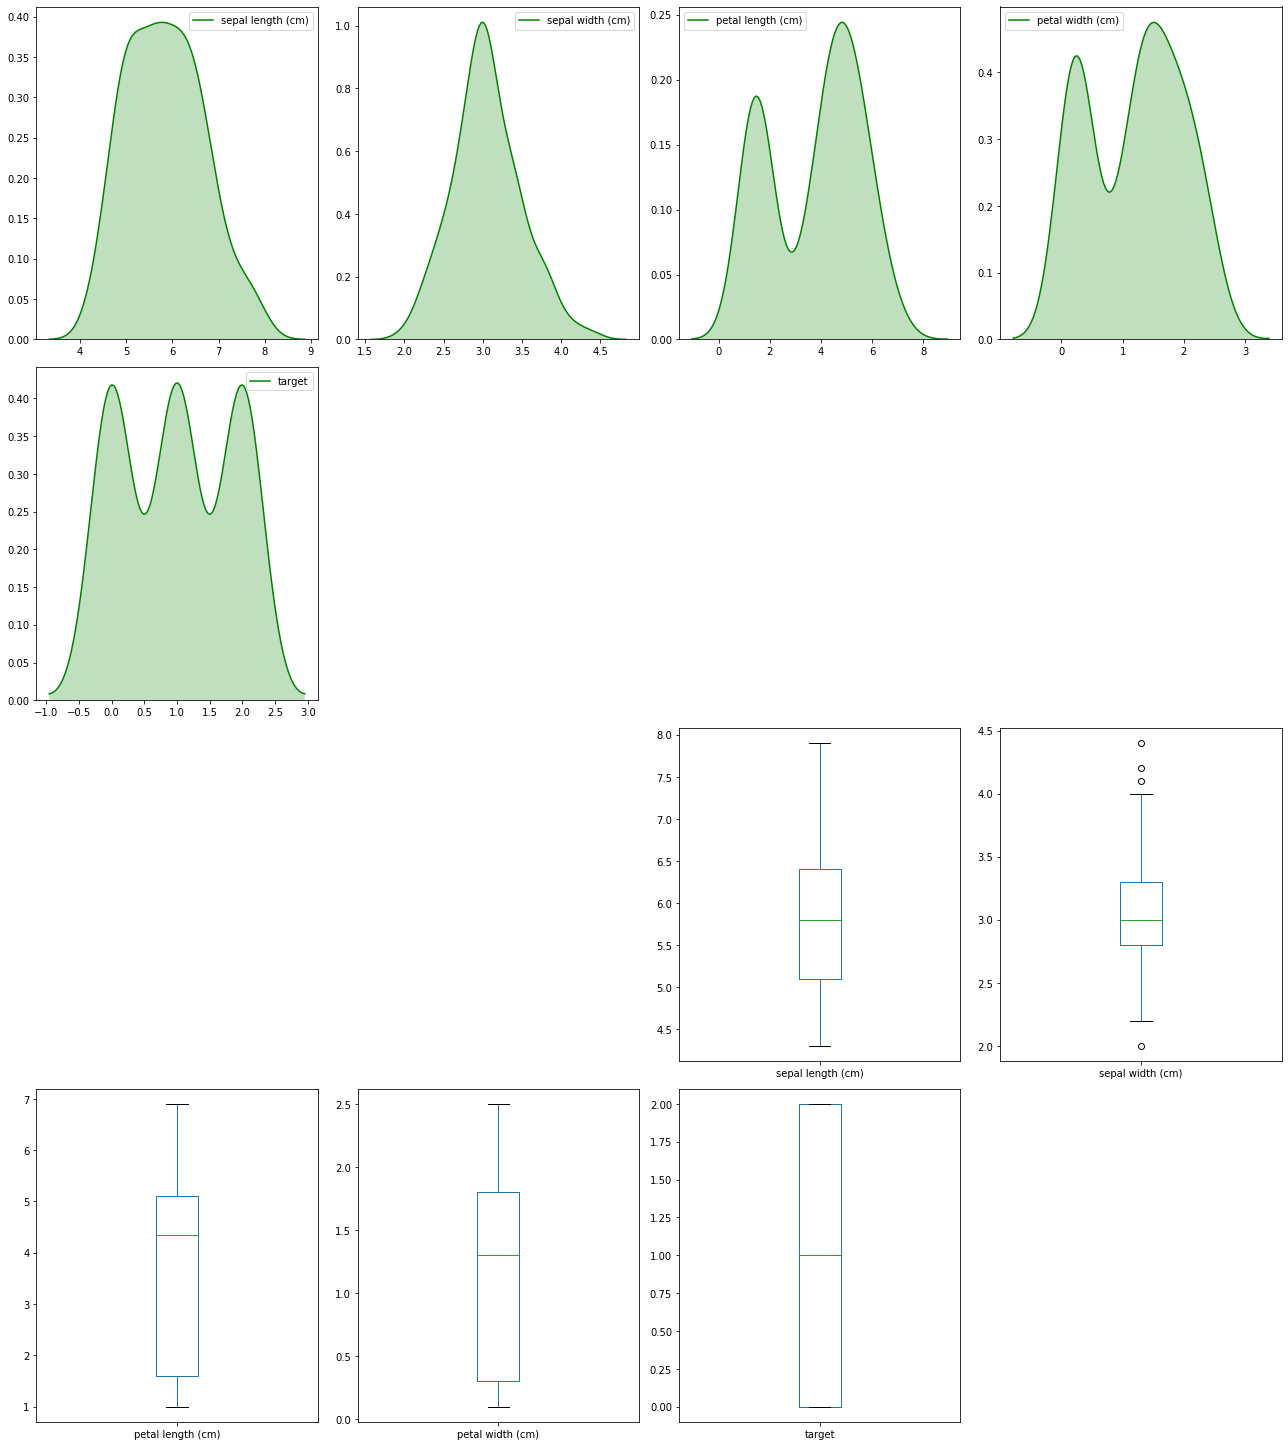

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
skewness,0.314911,0.318966,-0.274884,-0.102967,0.000000
kurtosis,-0.552064,0.228249,-1.402103,-1.340604,-1.510135


In [10]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [11]:
corr = df1.corr()

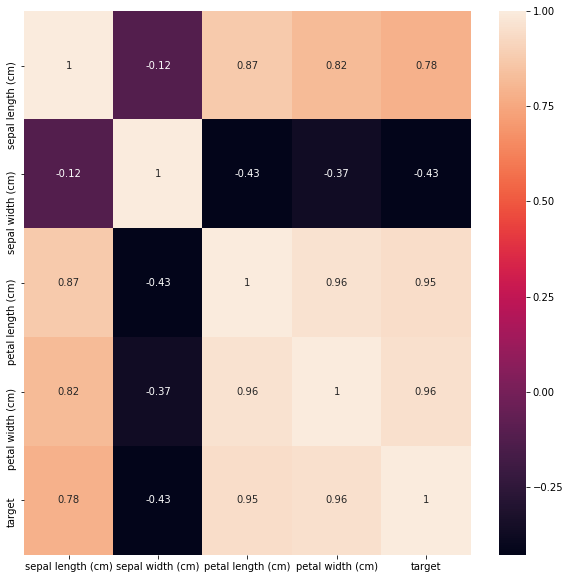

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

## __3 - Decision Tree Model__ 

In [13]:
df1.target.unique()

array([0., 1., 2.])

In [14]:
list(df1.columns)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [15]:
X = df1.iloc[:,0:4]
y = df1.iloc[:,4]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [17]:
y_train.value_counts()

2.0    41
0.0    40
1.0    39
Name: target, dtype: int64

In [18]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
pred_train = model.predict(x_train)

In [20]:
accuracy_score(y_train,pred_train)

1.0

In [21]:
confusion_matrix(y_train,pred_train)

array([[40,  0,  0],
       [ 0, 39,  0],
       [ 0,  0, 41]], dtype=int64)

In [22]:
pred_test = model.predict(x_test)

In [23]:
accuracy_score(y_test,pred_test)

0.9666666666666667

In [24]:
confusion_matrix(y_test,pred_test)

array([[10,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  9]], dtype=int64)

In [25]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [27]:
df_t.head()

,Actual,Predicted
102,2.0,2.0
147,2.0,2.0
9,0.0,0.0
23,0.0,0.0
53,1.0,1.0


In [28]:
cols = list(df1.columns)

In [29]:
predictors = cols[0:4]
target = cols[4]

In [32]:
dot_data = StringIO()

In [33]:
export_graphviz(model,out_file = dot_data, filled =True, rounded = True, feature_names =predictors,class_names = target, impurity = False )

In [34]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [35]:
graph.write_png('iris_full.png')

True

## __4 - Conclusion__ 

### Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 96%  

In [36]:
img = mpimg.imread('C:/Users/SohailShaikh/OneDrive - tiqets.com/Tiqets/Adhoc/DS/Decision Tree/iris_full.png') 

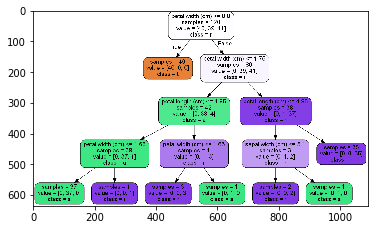

In [37]:
plt.imshow(img)

In [38]:
model.feature_importances_

array([0.        , 0.01448725, 0.06865863, 0.91685412])

In [39]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [40]:
fi

,feature,importance
3,petal width (cm),0.916854
2,petal length (cm),0.068659
1,sepal width (cm),0.014487
0,sepal length (cm),0.000000


### As seen in the above table petal width is most important feature